# Keras Basics

In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
import keras
import matplotlib.pyplot as plt

Using plaidml.keras.backend backend.


## Prepare Dataset

In [3]:
# Load Dataset (fashion MNIST)

fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion.load_data()

X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

'T-shirt/top'

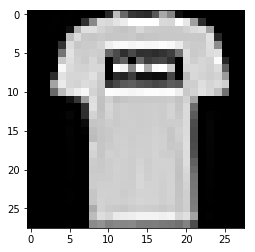

In [4]:
# https://github.com/zalandoresearch/fashion-mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.imshow(X_train_full[1], cmap='gray')
class_names[ y_train_full[1] ]

In [5]:
X_train_full[0].max(), X_train_full[0].min()  ## pixel from 0 -> 255, needs to scale it to 0 -> 1

(255, 0)

In [10]:
X_train_scaled = X_train_full.astype('float32')/255.0
X_train_scaled.dtype

dtype('float32')

## Define Model

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # So that we don't have to do .reshape(-1,1)
    keras.layers.Dense(300, activation="relu"),  # Hidden (1)
    keras.layers.Dense(100, activation="relu"),  # Hidden (2)
    keras.layers.Dense(10, activation="softmax") # Output Layer, 10 classes, decide with softmax
                                                 # Use sigmoid for 2
])

INFO:plaidml:Opening device "opencl_cpu.0"


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
# https://keras.io/losses/
# https://keras.io/optimizers/ 
# https://keras.io/metrics/

# sparse_categorical_crossentropy -- 1 target class, exclusive
# categorical_crossentropy -- Probability per class , keras.utils.to_categorical() to convert
# binary_crossentropy -- 2 classes
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

## Training

In [14]:
X_valid, X_train = X_train_scaled[:5000], X_train_scaled[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 11s 208us/step - loss: 0.7107 - acc: 0.3319 - val_loss: 0.5438 - val_acc: 0.3626
Epoch 2/20
55000/55000 [==============================] - 11s 207us/step - loss: 0.4884 - acc: 0.3445 - val_loss: 0.4637 - val_acc: 0.3622
Epoch 3/20
55000/55000 [==============================] - 12s 210us/step - loss: 0.4459 - acc: 0.3485 - val_loss: 0.4415 - val_acc: 0.3560
Epoch 4/20
22400/55000 [===========>..................] - ETA: 6s - loss: 0.4227 - acc: 0.3486